In [1]:
import tensorflow as tf
import numpy as np
import h5py
import matplotlib.pyplot as plt
import math
from scipy.misc import imsave
from datetime import datetime
import model_EIGEN1

In [2]:
FLAGS = tf.app.flags.FLAGS
tf.app.flags.DEFINE_integer('max_step', 80000, 'Number of max step')
tf.app.flags.DEFINE_integer('batch_size', 4, 'batch size')

In [3]:
def read_hdf5(file_name):
    with h5py.File(file_name, 'r') as f:
        images = np.asarray(f['images'])
        depths = np.asarray(f['depths'])
        infrareds = np.asarray(f['infrareds'])
    return images,depths,infrareds

In [10]:
images,depths,infrareds=read_hdf5('snow_data_test.h5')

In [11]:
x=images[12]
y=infrareds[12]
z=depths[12]

In [12]:
plt.imsave('images10.png',x)
plt.imsave('infrareds10.png',y)
plt.imsave('depths10.png',z)

In [5]:
i, j = 91, 95
imagetest = images[i:j]
depthtest = depths[i:j]
infraredtest = infrareds[i:j]

In [13]:
def test(images,infrareds,global_layers,local_layers,scaling_factor,is_training):
    with tf.Graph().as_default():
        logits = model_EIGEN.inference(images,infrareds,global_layers,local_layers,scaling_factor,is_training)
        dim = logits.get_shape()[3].value
        true_labels = tf.reshape(depthtest, [-1])
        true_labels = tf.cast(true_labels, tf.int64)
        pre_dep = tf.reshape(logits , [-1, dim])
        cross_entropy =  tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=pre_dep, labels=true_labels, name='cross_entropy')
        cross_entropy_mean = tf.reduce_mean(cross_entropy,name='cross_entropy_mean')
        saver = tf.train.Saver()
        with tf.Session() as sess:
            saver.restore(sess, 'saver/model.ckpt-100000')
            labels = sess.run(logits)
            loss= sess.run(cross_entropy_mean)
    return labels,loss

In [17]:
test_image = np.reshape(imagetest, [4, 256, 512, 3])
test_infrared = np.reshape(infraredtest, [4, 256, 512, 3])
labels,loss = test(test_infrared,test_image,3,3, 1,False)
print(loss)
pred = np.argmax(labels, 3)

INFO:tensorflow:Restoring parameters from saver/model.ckpt-100000


NotFoundError: Key RDB/fc6_VI/weights not found in checkpoint
	 [[Node: save/RestoreV2_65 = RestoreV2[dtypes=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/device:CPU:0"](_arg_save/Const_0_0, save/RestoreV2_65/tensor_names, save/RestoreV2_65/shape_and_slices)]]

Caused by op 'save/RestoreV2_65', defined at:
  File "D:\python\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "D:\python\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "D:\python\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "D:\python\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "D:\python\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "D:\python\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "D:\python\lib\site-packages\tornado\ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "D:\python\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "D:\python\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "D:\python\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "D:\python\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "D:\python\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "D:\python\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "D:\python\lib\site-packages\ipykernel\kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "D:\python\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "D:\python\lib\site-packages\ipykernel\ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "D:\python\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "D:\python\lib\site-packages\IPython\core\interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "D:\python\lib\site-packages\IPython\core\interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "D:\python\lib\site-packages\IPython\core\interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-17-d41f48b512fc>", line 3, in <module>
    labels,loss = test(test_infrared,test_image,3,3, 1,False)
  File "<ipython-input-13-5f2fed7197e2>", line 11, in test
    saver = tf.train.Saver()
  File "D:\python\lib\site-packages\tensorflow\python\training\saver.py", line 1218, in __init__
    self.build()
  File "D:\python\lib\site-packages\tensorflow\python\training\saver.py", line 1227, in build
    self._build(self._filename, build_save=True, build_restore=True)
  File "D:\python\lib\site-packages\tensorflow\python\training\saver.py", line 1263, in _build
    build_save=build_save, build_restore=build_restore)
  File "D:\python\lib\site-packages\tensorflow\python\training\saver.py", line 751, in _build_internal
    restore_sequentially, reshape)
  File "D:\python\lib\site-packages\tensorflow\python\training\saver.py", line 427, in _AddRestoreOps
    tensors = self.restore_op(filename_tensor, saveable, preferred_shard)
  File "D:\python\lib\site-packages\tensorflow\python\training\saver.py", line 267, in restore_op
    [spec.tensor.dtype])[0])
  File "D:\python\lib\site-packages\tensorflow\python\ops\gen_io_ops.py", line 1020, in restore_v2
    shape_and_slices=shape_and_slices, dtypes=dtypes, name=name)
  File "D:\python\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "D:\python\lib\site-packages\tensorflow\python\framework\ops.py", line 2956, in create_op
    op_def=op_def)
  File "D:\python\lib\site-packages\tensorflow\python\framework\ops.py", line 1470, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

NotFoundError (see above for traceback): Key RDB/fc6_VI/weights not found in checkpoint
	 [[Node: save/RestoreV2_65 = RestoreV2[dtypes=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/device:CPU:0"](_arg_save/Const_0_0, save/RestoreV2_65/tensor_names, save/RestoreV2_65/shape_and_slices)]]


In [ ]:
log = 0
for i in range (5):
    imagetest = images[(i*4) : ((i+1)*4)]
    depthtest = depths[(i*4) : ((i+1)*4)]
    
    test_image = np.reshape(imagetest, [4, 256, 512, 3])
    
    labels = test(test_image,3,3, 1,False)
    d = np.reshape(depthtest, (-1))+1
    d_p = np.reshape(pred, (-1))+1
    log+= np.sum(np.abs(np.log10(d) - np.log10(d_p)))
    
print(log/ (4*256*512*5))

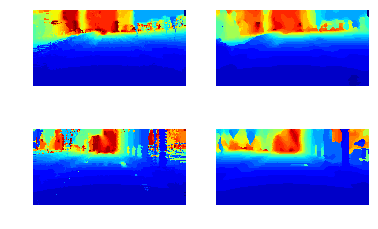

In [54]:
plt.subplot(221)
plt.imshow(depthtest[1],cmap='jet')
plt.axis('off')
plt.subplot(222)
plt.imshow(pred[1],cmap='jet')
plt.axis('off')
plt.subplot(223)
plt.imshow(depthtest[3],cmap='jet')
plt.axis('off')
plt.subplot(224)
plt.imshow(pred[3],cmap='jet')
plt.axis('off')
#plt.savefig('80000nonpyramid1000-1004.png')
plt.show()

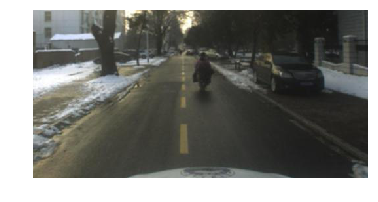

In [42]:
plt.imshow(imagetest[1])
plt.axis('off')
plt.show()